In [1]:
import random

from data_loader import *

from sklearn.model_selection import train_test_split

from imutils import build_montages

import matplotlib.pyplot as plt

In [2]:
image_dir1 = r"D:\ib811_database\S1_IEEE"
image_dir2 = r"D:\ib811_database\S2_IEEE"

images1 = load_images(image_dir1)
images2 = load_images(image_dir2)

pairs_1, pairs_2, labels = create_labels(images1, images2)

train_pairs_1, test_pairs_1, train_pairs_2, test_pairs_2, train_labels, test_labels = train_test_split(
    pairs_1, pairs_2, labels, test_size=0.2, random_state=42
)

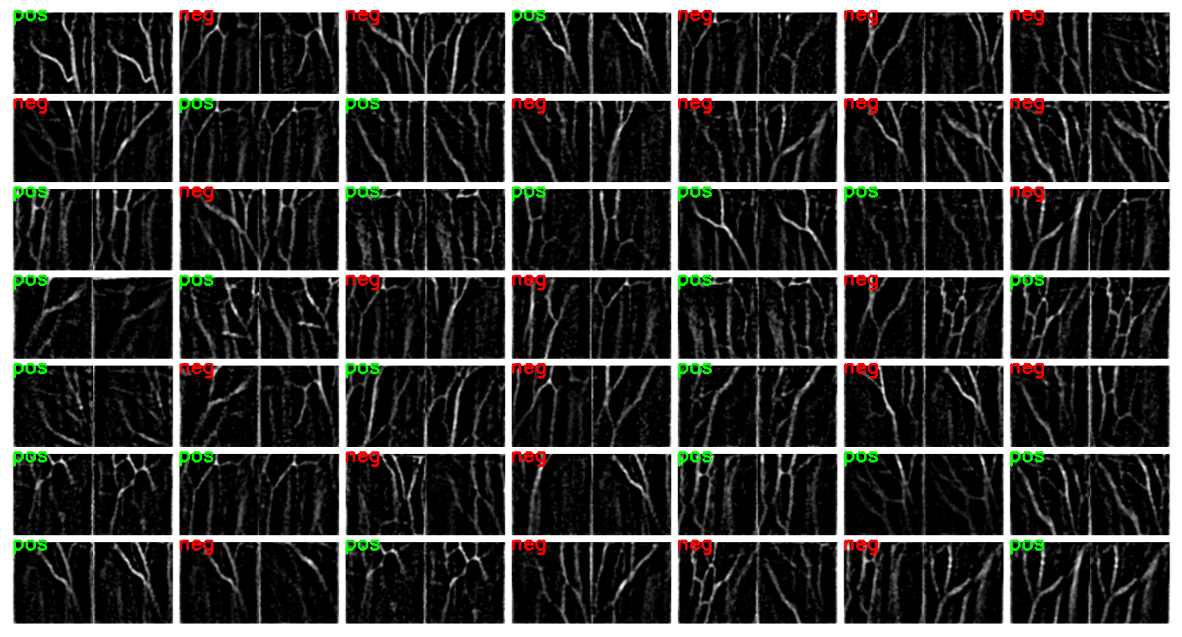

In [3]:
images = []

for i in random.sample(range(len(train_pairs_1)), 49):
    imageA = train_pairs_1[i]
    imageB = train_pairs_2[i]
    label = train_labels[i]

    border_size = 10
    output = np.full((256 + 2 * border_size, 512 + 2 * border_size), 255, dtype="uint8")
    
    output[border_size:-border_size, border_size:-border_size] = np.hstack([imageA.squeeze(), imageB.squeeze()])

    text = "pos" if label == 0 else "neg"
    color = (0, 255, 0) if label == 0 else (255, 0, 0)

    vis = cv2.merge([output] * 3)
    vis = cv2.resize(vis, (192, 102), interpolation=cv2.INTER_LINEAR)
    cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    images.append(vis)

montage = build_montages(images, (192, 102), (7, 7))[0]

plt.figure(figsize=(15, 15))
plt.imshow(montage)
plt.axis("off")
plt.show()